In [18]:
%load_ext autoreload
%autoreload 2

import __confing
__confing.change_to_root_folder()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Current directory: c:\Users\Leo\OneDrive\Escritorio\Final Proyect


In [59]:
import pandas as pd

from src import value_filler as vs
from src import feature_selection as fs
from src import data_procces as dp

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from src import evaluation

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report,mean_squared_error

In [60]:
df=pd.read_csv(r'data\waves\all_waves.csv')
target='rahosp1y'

In [61]:
# Drope
df = df.drop(['rahspnit1y','wave','rahhidnp'], axis=1)

df = df.dropna(subset=[target])

porcentaje_nulos = df.isnull().sum(axis=1) / len(df.columns)
df = df[(df['rahosp1y'] != 0) | (porcentaje_nulos <= 0.4)]

In [62]:
# filling
df = fs.fast_fill(df)

In [63]:
# filtering
l1=fs.get_corr_columns(df,target,True)
l2=fs.get_corr_columns(df,target,False)
l3=l1+l2

df_f = df[l3]
df_f[target] = df[target]

C:\Users\Leo\AppData\Local\Temp\ipykernel_10312\2402801741.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f[target] = df[target]


In [137]:
# split
y=df_f['rahosp1y']
X=df_f.drop('rahosp1y',axis=1)

X_train, X_test, y_train, y_test=dp.split_data(X, y, test_size=0.2, random_state=40)

In [126]:
# resample ()
X_train, y_train = dp.apply_resample(X_train, y_train,v=1.25)
X_test, y_test = dp.apply_resample(X_test, y_test,v=1)

In [138]:
# smote
X_train, y_train = dp.apply_smote(X_train, y_train)

In [139]:
# scaler
X_train, X_test = dp.apply_standard_scaler(X_train, X_test)

In [140]:
# power transform
X_train, X_test = dp.apply_power_transform(X_train, X_test)

In [141]:
best_params={
    'max_depth': 3,
    'learning_rate': 0.21437737019643555,
    'n_estimators': 383,
    'min_child_weight': 1,
    'gamma': 1.7231253295851337e-07,
    'subsample': 0.9074151372299069,
    'colsample_bytree': 0.9210455551716151,
    'reg_alpha': 1.8101876780247352e-07,
    'reg_lambda': 5.689166590043403e-08
}

# Entrenar el modelo final con los mejores parámetros
best_model = XGBClassifier(**best_params)
best_model.fit(X_train, y_train)

# Predecir sobre el conjunto de prueba utilizando el modelo final
y_pred = best_model.predict(X_test)
final_rmse = mean_squared_error(y_test, y_pred, squared=False)

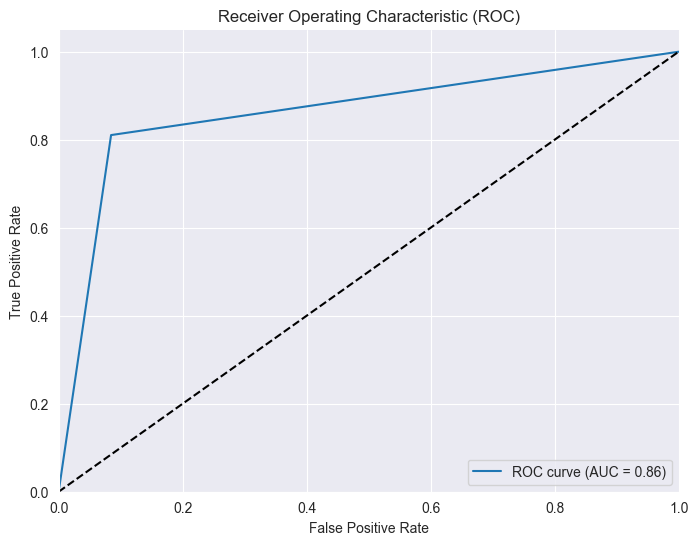

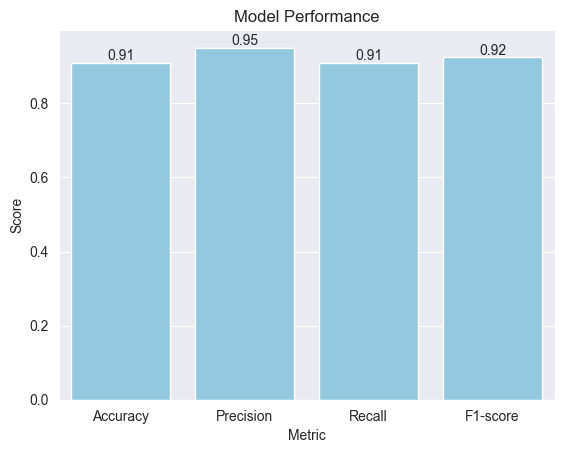

In [142]:
evaluation.plot_roc(y_pred,y_test)
evaluation.get_model_performance(y_pred,y_test)